DATA INFORMATION

Bank Customer Related Data

1 - row number<br>
2 - age (numeric)<br>
3 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self employed', 'services', 'student', 'technician', 'unemployed', 'unknown')<br> 
4 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br> 
5 - education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br> 
6 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

Contact Related Information

9 - contact: contact communication type (categorical: 'cellular','telephone')<br> 
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br> 
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br> 
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

Miscellaneous Information

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after client was last contacted  (numeric; 999 = client was not previously contacted)<br> 
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br> 
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
17 - y: has the client subscribed a term deposit? (binary: 'yes','no')

Categorical Variables:

* Marital - (Married , Single , Divorced)
* Job - (Management, BlueCollar, Technician, entrepreneur, retired, admin., services, selfemployed, housemaid, student, unemployed, unknown)
* Contact - (Telephone, Cellular, Unknown)
* Education - (Primary, Secondary, Tertiary, Unknown)
* Month - (Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)
* Poutcome - (Success, Failure, Other, Unknown)
* Housing - (Yes, No)
* Loan - (Yes, No)
* deposit - (Yes, No)
* Default - (Yes, No)

Numerical Variable:

* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous


In [1]:
#Pandas for dataframes
import pandas as pd

#Changing default display option to display all columns
pd.set_option('display.max_columns', 21)

#Numpy for numerical computing
import numpy as np 

#Matplotlib for visualization
import matplotlib.pyplot as plt

#Display plots in the notebook
%matplotlib inline 

#Seaborn for easier visualization
import seaborn as sns

#Stats package for statistical analysis
from scipy import stats

#Machine learning packages
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
 
df = pd.read_csv('Data/bankfull.csv', sep=';')

df.head()

C:\Users\K.C\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Number of observations & variables
df.shape

(45211, 17)

In [4]:
#Data Types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
#Additional DataFrame Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Presence of Null Values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#Summary Information
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Transformation of categorical variables to numeric based integers are expected to result in additional summary data for analysis.

In [14]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

In [15]:
continuous_vars

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [16]:
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

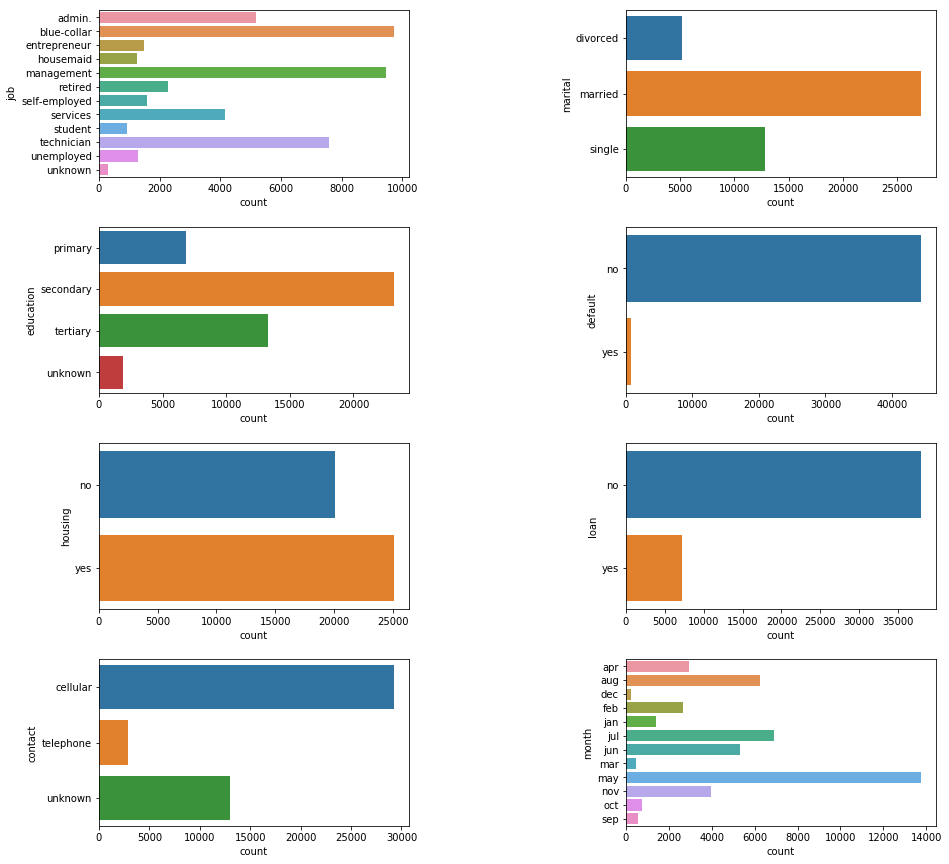

In [35]:
#Plots for count of categorical variables
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)

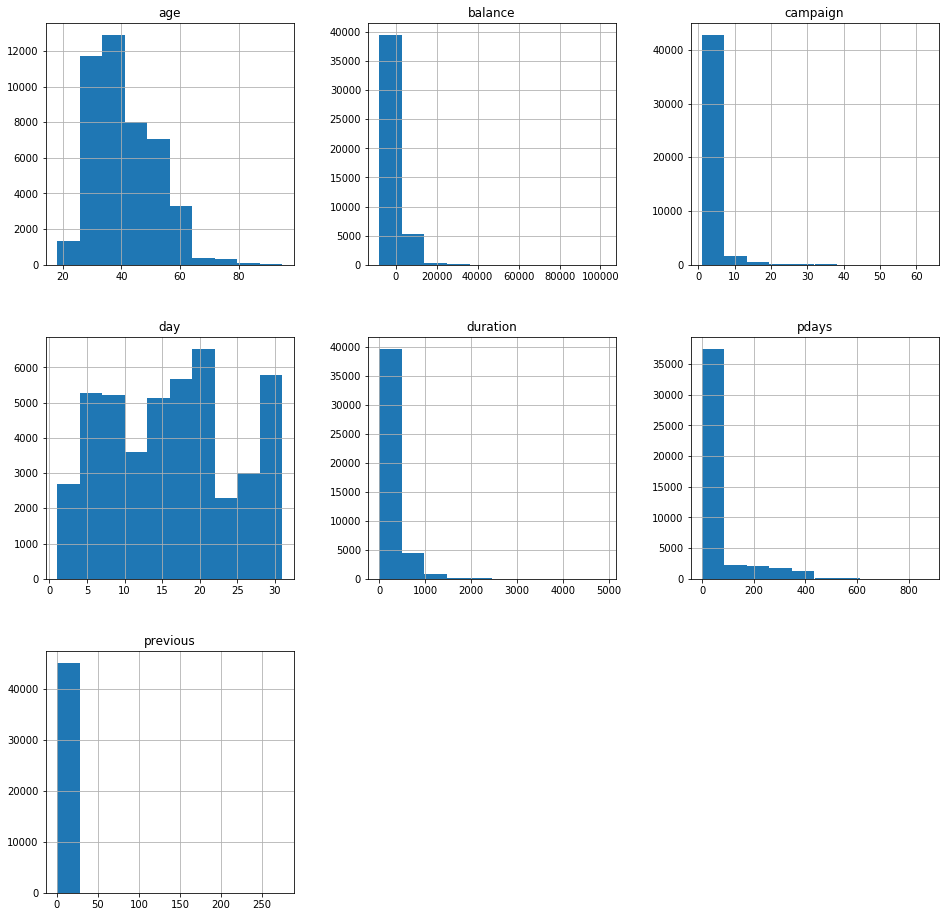

In [36]:
dfhist = df.hist(column=continuous_vars, figsize = (16,16))

In [37]:
#Job type as proportion of overall number of values
df.job.value_counts()/df.job.count()

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64